<h4>Importation des libraries :</h4>

In [7]:
from imutils import paths
import face_recognition #face_recognition library
import pickle # pickle to save the encodings
import cv2
import os #operating system

from sklearn.cluster import DBSCAN
from imutils import build_montages
import numpy as np
import argparse
import matplotlib.pyplot as plt

<h4>Pre-traitement et Extraction des features :</h4>

In [3]:
ENCODINGS_PATH=os.path.join(os.getcwd(),'gameofthrons.pickle')
imagePaths = list(paths.list_images("data"))


data = []

# parcourir le imagePaths
for (i, imagePath) in enumerate(imagePaths):
    
    print(".... traitement de l'image {}/{}".format(i + 1,len(imagePaths)))
    print(imagePath)
    
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    boxes = face_recognition.face_locations(image,model='cnn') #(x, y) de chaque visage dans les images
    #construire un dictionnaire du chemin de l'image, de l'emplacement de la boîte englobante
    encodings = face_recognition.face_encodings(image, boxes) 
    

    d = [{"imagePath": imagePath, "loc": box, "encoding": enc}
        for (box, enc) in zip(boxes, encodings)]
    data.extend(d)

#stocker les données des encodages faciaux sur le disque
f = open('gameofthrons.pickle', "wb")
f.write(pickle.dumps(data))
f.close()
print("Encodings of images saved in {}".format(ENCODINGS_PATH))

.... traitement de l'image 1/23
data\1.jpg
.... traitement de l'image 2/23
data\12.jpg
.... traitement de l'image 3/23
data\122112.jpg
.... traitement de l'image 4/23
data\123.jpg
.... traitement de l'image 5/23
data\1234.jpg
.... traitement de l'image 6/23
data\123456.jpg
.... traitement de l'image 7/23
data\2.jpg
.... traitement de l'image 8/23
data\21.jpg
.... traitement de l'image 9/23
data\3.jpg
.... traitement de l'image 10/23
data\32.jpg
.... traitement de l'image 11/23
data\4.jpg
.... traitement de l'image 12/23
data\54.jpg
.... traitement de l'image 13/23
data\543.jpg
.... traitement de l'image 14/23
data\56.jpg
.... traitement de l'image 15/23
data\6.jpg
.... traitement de l'image 16/23
data\67.jpg
.... traitement de l'image 17/23
data\7.jpg
.... traitement de l'image 18/23
data\768.jpg
.... traitement de l'image 19/23
data\7687.jpg
.... traitement de l'image 20/23
data\8.jpg
.... traitement de l'image 21/23
data\9.jpg
.... traitement de l'image 22/23
data\98.jpg
.... traitem

<h4>Clustering :</h4>

Chargement des encodages ....
clustering ....
visages uniques: 3
visage pour le face ID: -1
visage pour le face ID: 0
visage pour le face ID: 1
visage pour le face ID: 2


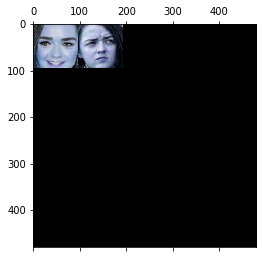

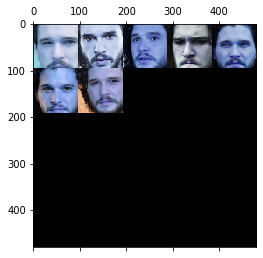

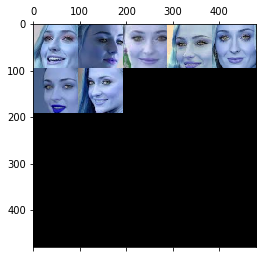

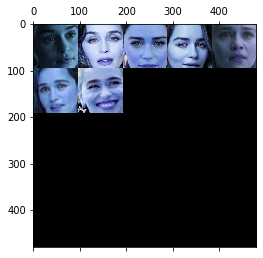

In [8]:
print("Chargement des encodages ....")
data = pickle.loads(open("gameofthrons.pickle", "rb").read())
data = np.array(data)
encodings = [d["encoding"] for d in data]

# regrouper les encastrements
print("clustering ....")
clt = DBSCAN(eps=0.5,min_samples=3, metric="euclidean", n_jobs=None)
clt.fit(encodings)

# déterminer le nombre total de visages uniques trouvées dans l’ensemble de données
labelIDs = np.unique(clt.labels_)
numUniqueFaces = len(np.where(labelIDs > -1)[0])
print("visages uniques: {}".format(numUniqueFaces))

# boucle sur le visage unique
for labelID in labelIDs:
        # trouver tous les index dans `data` array qui appartiennent à l’ID 
        # de l’étiquette courante, échantillonner au hasard un maximum de 25 index 
        # à partir de l’ensemble
        print("visage pour le face ID: {}".format(labelID))
        idxs = np.where(clt.labels_ == labelID)[0]
        # initialize the list of faces to include in the montage
        faces = []
        ctr=0
        dir=str(labelID)
        if not os.path.exists(dir):
             os.mkdir(dir) 

       
        for i in idxs:    #loop over the sampled indexes
                image = cv2.imread(data[i]['imagePath'])
                cv2.imwrite(str(labelID)+"/"+str(ctr)+".jpg", image)
                ctr=ctr+1
                (top, right, bottom, left) = data[i]["loc"]
                face = image[top:bottom, left:right]

                face = cv2.resize(face, (96, 96))
                faces.append(face)
        # create a montage using 96x96 "tiles" with 5 rows and 5 columns
        montage = build_montages(faces, (96, 96), (5, 5))[0]
        cv2.imwrite(str(labelID)+".jpg", montage)
        # show the output montage
        title = "Face ID #{}".format(labelID)
        title = "Unknown Faces" if labelID == -1 else title
        plt.matshow(montage)